## Business Objectives

Our Main Objective is to predict the sales of all the stores and departments for the next 13 weeks. 

## Importing Necessary Libraries and Data

In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

# !pip install arch
# from arch import arch_model
# from arch.univariate import ARX, GARCH, StudentsT, Normal

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import calendar

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df_store = pd.read_csv(r"C:\Users\shrimantas\Downloads\New folder\hackathon\stores.csv") #store data

In [4]:
df_train = pd.read_csv(r"C:\Users\shrimantas\Downloads\New folder\hackathon\sales.csv") # train set

In [5]:
df_features = pd.read_csv(r"C:\Users\shrimantas\Downloads\New folder\hackathon\external_data.csv") #external information

## First Look to Data and Merging Three Dataframes

In [6]:
df_store.head()

,Store,Type
0,1,A
1,2,A
2,3,B
3,4,A
4,5,B


In [7]:
# df_store = df_store.drop(["Size"], axis = 1)
# df_store.head()

In [8]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


In [9]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,False


In [10]:
df_features.tail()

,Store,Date,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday
8185,45,6/28/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,False
8186,45,7/5/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,False
8187,45,7/12/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,False
8188,45,7/19/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,False
8189,45,7/26/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,False


In [11]:
# new_column_names = {
#     'MarkDown1': 'PROMO1',
#     'MarkDown2': 'PROMO2',
#     'MarkDown3': 'PROMO3',
#     'MarkDown4': 'PROMO4',
#     'MarkDown5': 'PROMO5',
# }

# df_features.rename(columns=new_column_names, inplace=True)

In [12]:
df_features

,Store,Date,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,False
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,6/28/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,False
8186,45,7/5/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,False
8187,45,7/12/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,False
8188,45,7/19/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,False


In [13]:
#Data manipulation
#Checking for null values
df_features.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
PROMO1         4158
PROMO2         5269
PROMO3         4577
PROMO4         4726
PROMO5         4140
CPI             585
IsHoliday         0
dtype: int64

In [14]:
# Calculate the percentage of missing values in each column
missing_percentages = df_features.isnull().mean() * 100

# Print the result
print(missing_percentages)

Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
PROMO1         50.769231
PROMO2         64.334554
PROMO3         55.885226
PROMO4         57.704518
PROMO5         50.549451
CPI             7.142857
IsHoliday       0.000000
dtype: float64


# 2) Feature Engineering


*   Since we are going to fit tree-based models, feature scaling is not required. Random Forest/Boosted trees use information gain/gini coefficient inherently which will not be affected by scaling unlike many other machine learning models (such as Linear Regression, PCA)

*   We One hot encode "Type" categorical feature since it contains more than 2 levels (A/B/C)

*   We label encode the "IsHoliday" categorical feature since it contains just 2 levels (True/False)

*   We create new features namely - "IsSuperbowl", "IsLaborday", "IsThanksgiving", "IsChristmas" to identify the type of holiday 

*   Extract new features from "Date" feature such as year, month, week of year, week of month, day etc

*   Each of the feature "Markdown1", "Markdown2", "Markdown3", "Markdown4", and "Markdown5" has around 65% missing date, we ignore these variables from our analysis.

In [15]:
# df_features = df_features.drop(['PROMO1', 'PROMO2', 'PROMO3', 'PROMO4', 'PROMO5', "Unemployment"], axis=1)
# df_features

In [16]:
# Using rolling average to fill the missing values in CPI.
stores_list = list(range(1,46))
for store in stores_list:
  temp_df = df_features[df_features['Store'] == store]
  temp_df.Date = pd.to_datetime(temp_df.Date)
  temp_df = temp_df.set_index('Date')
  
  df_features.loc[(df_features.Store == store),['CPI']] = list(temp_df.CPI.fillna(temp_df.CPI.rolling(14,min_periods=1).mean()))

In [17]:
df_features

,Store,Date,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,False
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,6/28/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.545350,False
8186,45,7/5/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.570990,False
8187,45,7/12/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,False
8188,45,7/19/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,False


In [18]:
df_features.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
PROMO1         4158
PROMO2         5269
PROMO3         4577
PROMO4         4726
PROMO5         4140
CPI               0
IsHoliday         0
dtype: int64

In [19]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
dtypes: int64(1), object(1)
memory usage: 848.0+ bytes


In [20]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Store        8190 non-null   int64  
 1   Date         8190 non-null   object 
 2   Temperature  8190 non-null   float64
 3   Fuel_Price   8190 non-null   float64
 4   PROMO1       4032 non-null   float64
 5   PROMO2       2921 non-null   float64
 6   PROMO3       3613 non-null   float64
 7   PROMO4       3464 non-null   float64
 8   PROMO5       4050 non-null   float64
 9   CPI          8190 non-null   float64
 10  IsHoliday    8190 non-null   bool   
dtypes: bool(1), float64(8), int64(1), object(1)
memory usage: 648.0+ KB


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383040 entries, 0 to 383039
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         383040 non-null  int64  
 1   Dept          383040 non-null  int64  
 2   Date          383040 non-null  object 
 3   Weekly_Sales  383040 non-null  float64
 4   IsHoliday     383040 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 12.1+ MB


In [22]:
sales_group= df_train.groupby(['Store','Date'])[['Weekly_Sales']].sum()
sales_group.reset_index(inplace=True)
sales_group.head()

,Store,Date,Weekly_Sales
0,1,1/13/2012,1459601.17
1,1,1/14/2011,1391013.96
2,1,1/20/2012,1394393.84
3,1,1/21/2011,1327405.42
4,1,1/27/2012,1319325.59


In [23]:
df_train.size

1915200

In [24]:
sales_group.size

17550

In [25]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday_y,Type
0,1,1,2/5/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,False,A
1,1,2,2/5/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,False,A
2,1,3,2/5/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,False,A
3,1,4,2/5/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,False,A
4,1,5,2/5/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,False,A


In [26]:
df1=sales_group.merge(df_store, how='inner').merge(df_features, how='inner')
df1.head()

,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday
0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,False
1,1,1/14/2011,1391013.96,A,35.40,2.983,NaN,NaN,NaN,NaN,NaN,211.457411,False
2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.87,2807.19,33.88,500.62,3400.21,219.985689,False
3,1,1/21/2011,1327405.42,A,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,False
4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,220.078852,False


In [27]:
df1.shape

(5850, 13)

In [28]:
# predictions = df[["Store", "Dept"]]

In [29]:
# predictions = []
# from datetime import datetime, timedelta
# start_date = "8/3/2012"
# start_date = datetime.strptime(start_date, "%m/%d/%Y")
# num_weeks = 13
# dates = [pd.to_datetime(start_date) + timedelta(weeks = i) for i in range(num_weeks)]
# for store_num in range(1, 46):
#     for _ in range(82):
#         predictions.append((store_num, df["Dept"], dates[(store_num-1) % num_weeks]))
# predictions = pd.DataFrame(predictions, columns = ["Store", "Dept", "Date"])
# predictions

In [30]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column

In [31]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column

In [32]:
df.head() # last ready data set

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,Type
0,1,1,2/5/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,A
1,1,2,2/5/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,A
2,1,3,2/5/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,A
3,1,4,2/5/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,A
4,1,5,2/5/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,A


In [33]:
df.shape

(383040, 14)

## Looking at Columns

## Store & Department Numbers

In [34]:
df['Store'].nunique() # number of different values

45

In [35]:
df['Dept'].nunique() # number of different values

81

Now, I will look at the average weekly sales for each store and each department to see if there is any weird values or not. There are 45 stores and 81 departments for stores. 

In [36]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22799.824231,46129.097538,12279.993000,36933.026385,24599.082692,4976.181154,25148.428154,35500.129769,27481.432385,31190.211154,...,81803.283308,64084.686846,134640.955615,71216.360923,63127.416077,120172.110769,32967.728991,34995.145615,11836.262077,377.502857
2,31035.544000,65901.170538,16441.138538,45609.274077,31089.358692,7000.989308,41298.726231,58593.138462,34170.218923,39005.202923,...,97285.857077,80503.267077,163916.769692,69945.811231,69759.757538,143022.187077,34114.164769,40557.324154,14110.842692,576.426667
3,7202.570846,16605.140385,5158.147769,8339.353769,11505.734615,2048.541385,10134.612846,8301.474231,8724.974615,10648.087077,...,1517.678462,304.243231,7383.727154,NaN,740.728936,15419.890000,3903.517385,324.110079,30.830000,NaN
4,36968.929538,93136.245462,17683.216077,56360.048385,46396.039385,8443.877154,51356.931077,63182.502231,34041.500231,37112.759615,...,88648.674308,66313.333846,158029.742692,66955.768000,67600.560769,145967.149000,37706.242308,39008.111308,14953.088231,739.187576
5,9723.510000,12301.101231,3887.254308,9833.651615,6831.164462,1251.182077,6233.660769,13660.423538,7671.696000,9766.253846,...,3037.735769,1444.289231,7658.309154,NaN,440.871194,19151.149385,5781.879538,667.805088,31.307143,NaN
6,24212.193462,50235.678308,15859.076077,34220.381923,35150.704000,7431.581846,35558.797923,47507.081769,47598.657538,47412.123846,...,53794.236923,45302.081385,98941.729462,41151.249462,41599.767077,88957.075769,30450.912077,20600.015231,9724.258308,470.328065
7,9621.408462,22529.072231,8308.431154,14866.433769,14189.325615,6477.175000,11195.419692,13866.444692,28471.277923,21273.564692,...,13776.604231,10267.662385,26417.158308,1286.845923,579.603725,33954.070308,1133.421615,4355.032385,260.737500,15.000000
8,14941.036308,35705.919385,9944.439615,20956.231846,20117.987231,3487.888231,20645.786154,26250.066923,11585.249077,20661.499231,...,39114.771000,31457.808538,59981.677846,27240.208769,25352.078385,62784.635846,16.986667,16854.761846,6858.824923,395.403200
9,11789.574769,24830.584077,7009.675923,17038.596077,19474.446385,2887.553538,13982.531231,21200.824692,12833.216308,12672.316538,...,2954.721615,857.493000,13703.128308,21.240000,652.575970,28971.442462,3571.519615,372.655556,27.930000,NaN


Store numbers begin from 1 to 45, department numbers are from 1 to 99, but some numbers are missing such as there is no 88 or 89 etc. Total number of departments is 81. 

From the pivot table, it is obviously seen that there are some wrong values such as there are 0 and minus values for weekly sales. But sales amount can not be minus. Also, it is impossible for one department not to sell anything whole week. So, I will change this values.

In [37]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,Type
188,1,47,2/19/2010,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,A
406,1,47,3/12/2010,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,A
2549,1,47,10/8/2010,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,A
3632,1,54,1/21/2011,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,A
4132,1,47,3/11/2011,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380848,45,54,12/16/2011,-10.64,False,39.93,3.413,4631.26,8.92,801.34,848.33,2757.82,188.797935,B
381335,45,77,2/3/2012,-23.00,False,42.96,3.617,35348.47,4373.64,21.05,38157.91,5908.50,189.612228,B
382345,45,49,5/18/2012,-3.97,False,66.30,3.848,6813.74,NaN,13.86,936.49,2941.55,190.996448,B
382412,45,49,5/25/2012,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,B


1237 rows in 383040 rows means 0.3%, so I can delete and ignore these rows which contains wrong sales values.

In [38]:
df = df.loc[df['Weekly_Sales'] > 0]

In [39]:
df.shape # new data shape

(381803, 14)

## Date

In [40]:
df['Date'].head(5).append(df['Date'].tail(5)) # to see first and last 5 rows.

0          2/5/2010
1          2/5/2010
2          2/5/2010
3          2/5/2010
4          2/5/2010
383035    7/27/2012
383036    7/27/2012
383037    7/27/2012
383038    7/27/2012
383039    7/27/2012
Name: Date, dtype: object

Our data is from 5th of February 2010 to 27th of July 2012.  

## IsHoliday column

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

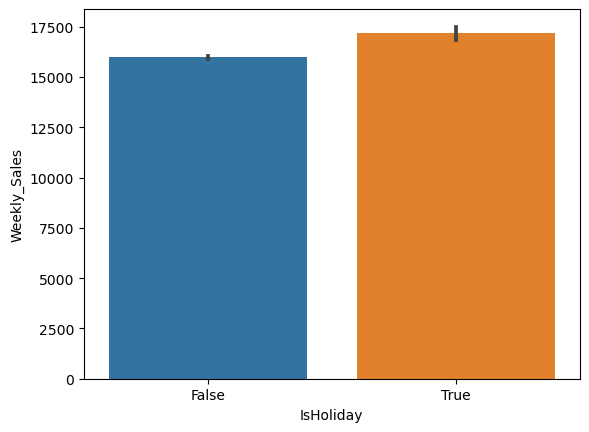

In [41]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [42]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2/12/2010', '9/10/2010', '11/26/2010', '12/31/2010', '2/11/2011',
       '9/9/2011', '11/25/2011', '12/30/2011', '2/10/2012'], dtype=object)

In [43]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

121

All holidays are not in the data. There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12

Labor Day: 10-Sep-10, 9-Sep-11

Thanksgiving: 26-Nov-10, 25-Nov-11

Christmas: 31-Dec-10, 30-Dec-11


After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 121 weeks for non-holiday and 10 weeks for holiday.

I want to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False. 

In [44]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2/12/2010')|(df['Date'] == '2/11/2011')|(df['Date'] == '2/10/2012'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2/12/2010')&(df['Date'] != '2/11/2011')&(df['Date'] != '2/10/2012'),'Super_Bowl'] = False

In [45]:
# Labor day dates in train set
df.loc[(df['Date'] == '9/10/2010')|(df['Date'] == '9/9/2011')|(df['Date'] == '9/07/2012'),'Labor_Day'] = True
df.loc[(df['Date'] != '9/10/2010')&(df['Date'] != '9/9/2011')&(df['Date'] != '9/07/2012'),'Labor_Day'] = False

In [46]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '11/26/2010')|(df['Date'] == '11/25/2011'),'Thanksgiving'] = True
df.loc[(df['Date'] != '11/26/2010')&(df['Date'] != '11/25/2011'),'Thanksgiving'] = False

In [47]:
#Christmas dates in train set
df.loc[(df['Date'] == '12/31/2010')|(df['Date'] == '12/30/2011'),'Christmas'] = True
df.loc[(df['Date'] != '12/31/2010')&(df['Date'] != '12/30/2011'),'Christmas'] = False

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

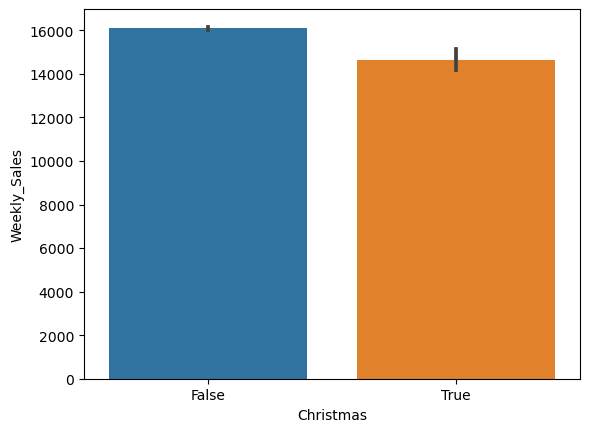

In [48]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

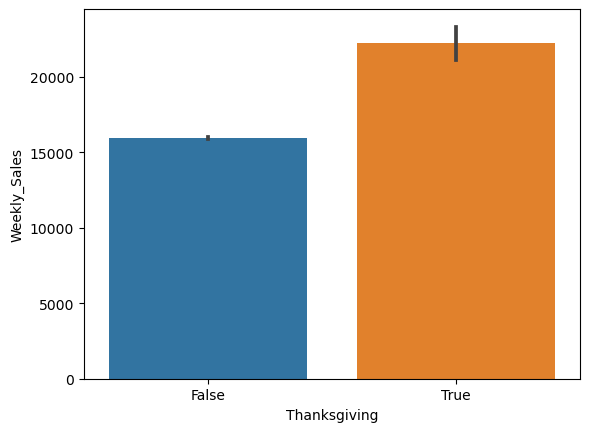

In [49]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-thanksgiving

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

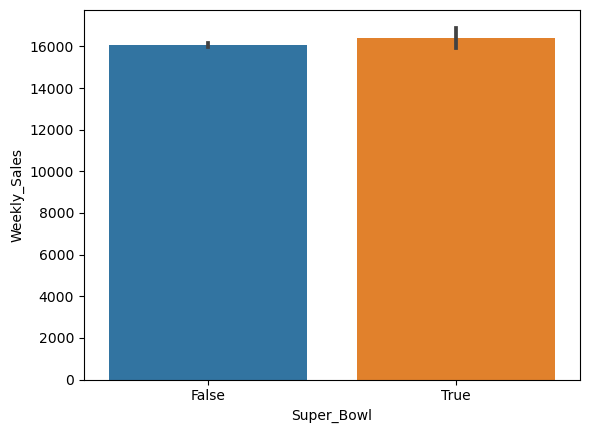

In [50]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

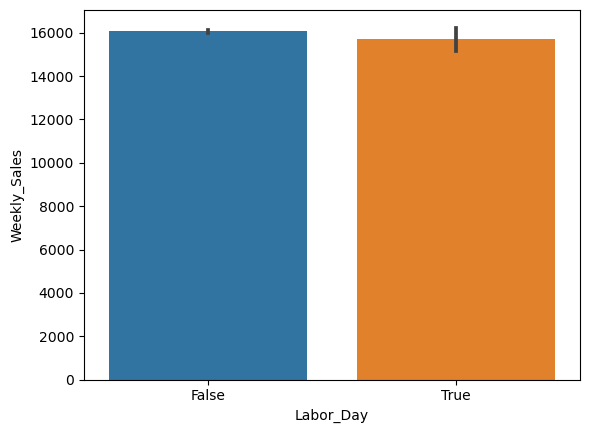

In [51]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day

It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

## Type Effect on Holidays

There are three different store types in the data as A, B and C.

In [52]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas 

Christmas  Type
False      A       20215.735197
           B       12341.148776
           C        9580.455246
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [53]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

Labor_Day  Type
False      A       20194.146119
           B       12333.831862
           C        9552.288703
True       A       19682.915015
           B       11950.079421
           C        9836.167852
Name: Weekly_Sales, dtype: float64

In [54]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
False         A       20072.114901
              B       12226.273768
              C        9554.399022
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [55]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

Super_Bowl  Type
False       A       20176.044329
            B       12324.649683
            C        9541.990671
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

I want to see percentages of store types.

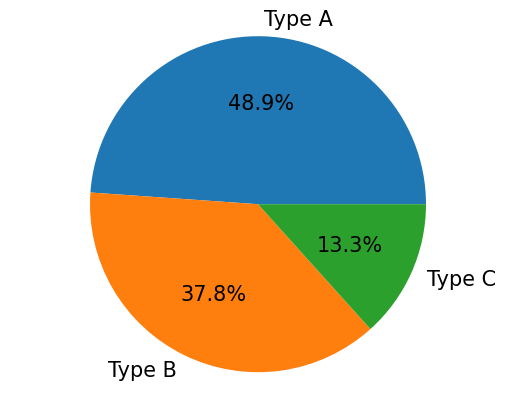

In [56]:
my_data = [48.88, 37.77 , 13.33 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show()

In [57]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15986.668309
True     17177.652375
Name: Weekly_Sales, dtype: float64

Nearly, half of the stores are belongs to Type A.

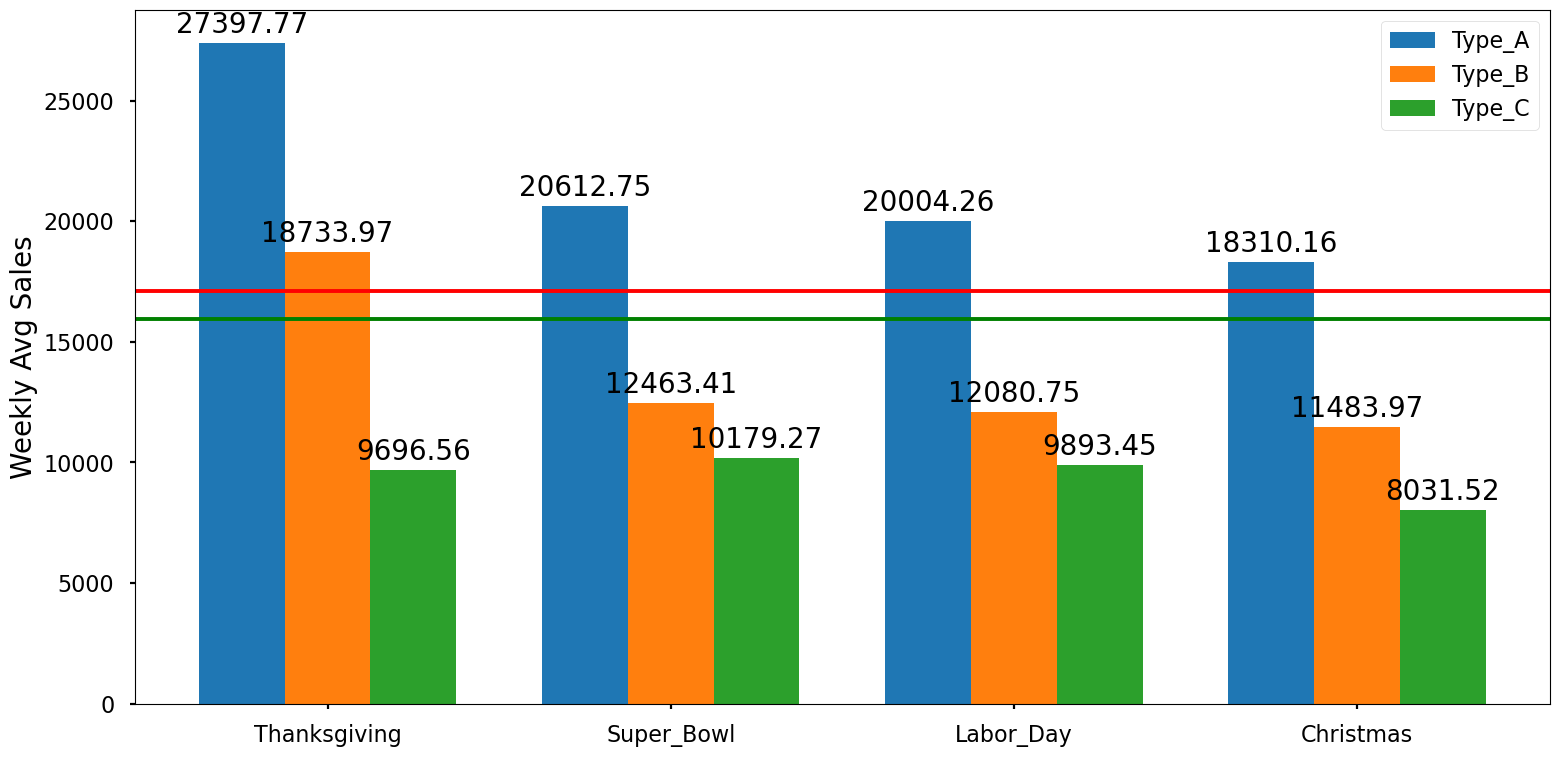

In [58]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

It is seen from the graph that, highest sale average is in the Thanksgiving week between holidays. And, for all holidays Type A stores has highest sales.

In [59]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,Type,Super_Bowl,Labor_Day,Thanksgiving,Christmas
82673,10,72,11/26/2010,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,B,False,False,True,False
306949,35,72,11/25/2011,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,B,False,False,True,False
86421,10,72,11/25/2011,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,B,False,False,True,False
303490,35,72,11/26/2010,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,B,False,False,True,False
119439,14,72,11/26/2010,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,A,False,False,True,False


Also, it is not surprise that top 5 highest weekly sales are belongs to Thanksgiving weeks.

In [60]:
df.describe() # to see weird statistical things

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI
count,381803.000000,381803.000000,381803.000000,381803.000000,381803.000000,112077.000000,88356.000000,101491.000000,99877.000000,112520.000000,381803.000000
mean,22.189273,44.225999,16069.652856,59.029980,3.317218,7140.581304,4161.235665,1927.830913,3434.233715,4806.664427,170.758575
std,12.784609,30.489843,22804.861501,18.653345,0.453192,8343.724764,10437.368231,11135.339224,6832.743305,6658.637977,38.969109
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.410000,135.160000,126.064000
25%,11.000000,18.000000,2134.780000,45.540000,2.885000,2255.050000,75.000000,5.080000,469.800000,1886.692500,131.980900
50%,22.000000,37.000000,7682.920000,60.420000,3.353000,5369.610000,351.220000,31.330000,1396.550000,3369.860000,182.260441
75%,33.000000,74.000000,20328.285000,73.520000,3.699000,9066.750000,3417.280000,144.660000,3457.250000,5518.540000,211.842177
max,45.000000,99.000000,693099.360000,100.140000,4.308000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,225.697078


Minimum value for weekly sales is 0.01. Most probably, this value is not true but I prefer not to change them now. Because, there are many departments and many stores. It takes too much time to check each department for each store (45 store for 81 departments). So, I take averages for EDA. 

# Deeper Look in Sales

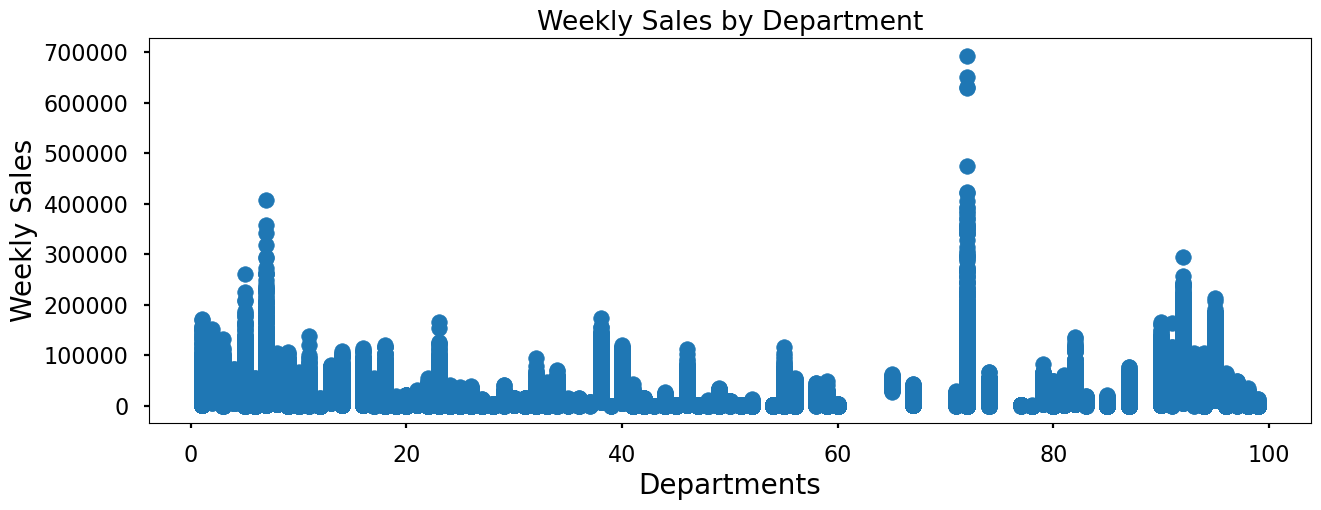

In [61]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

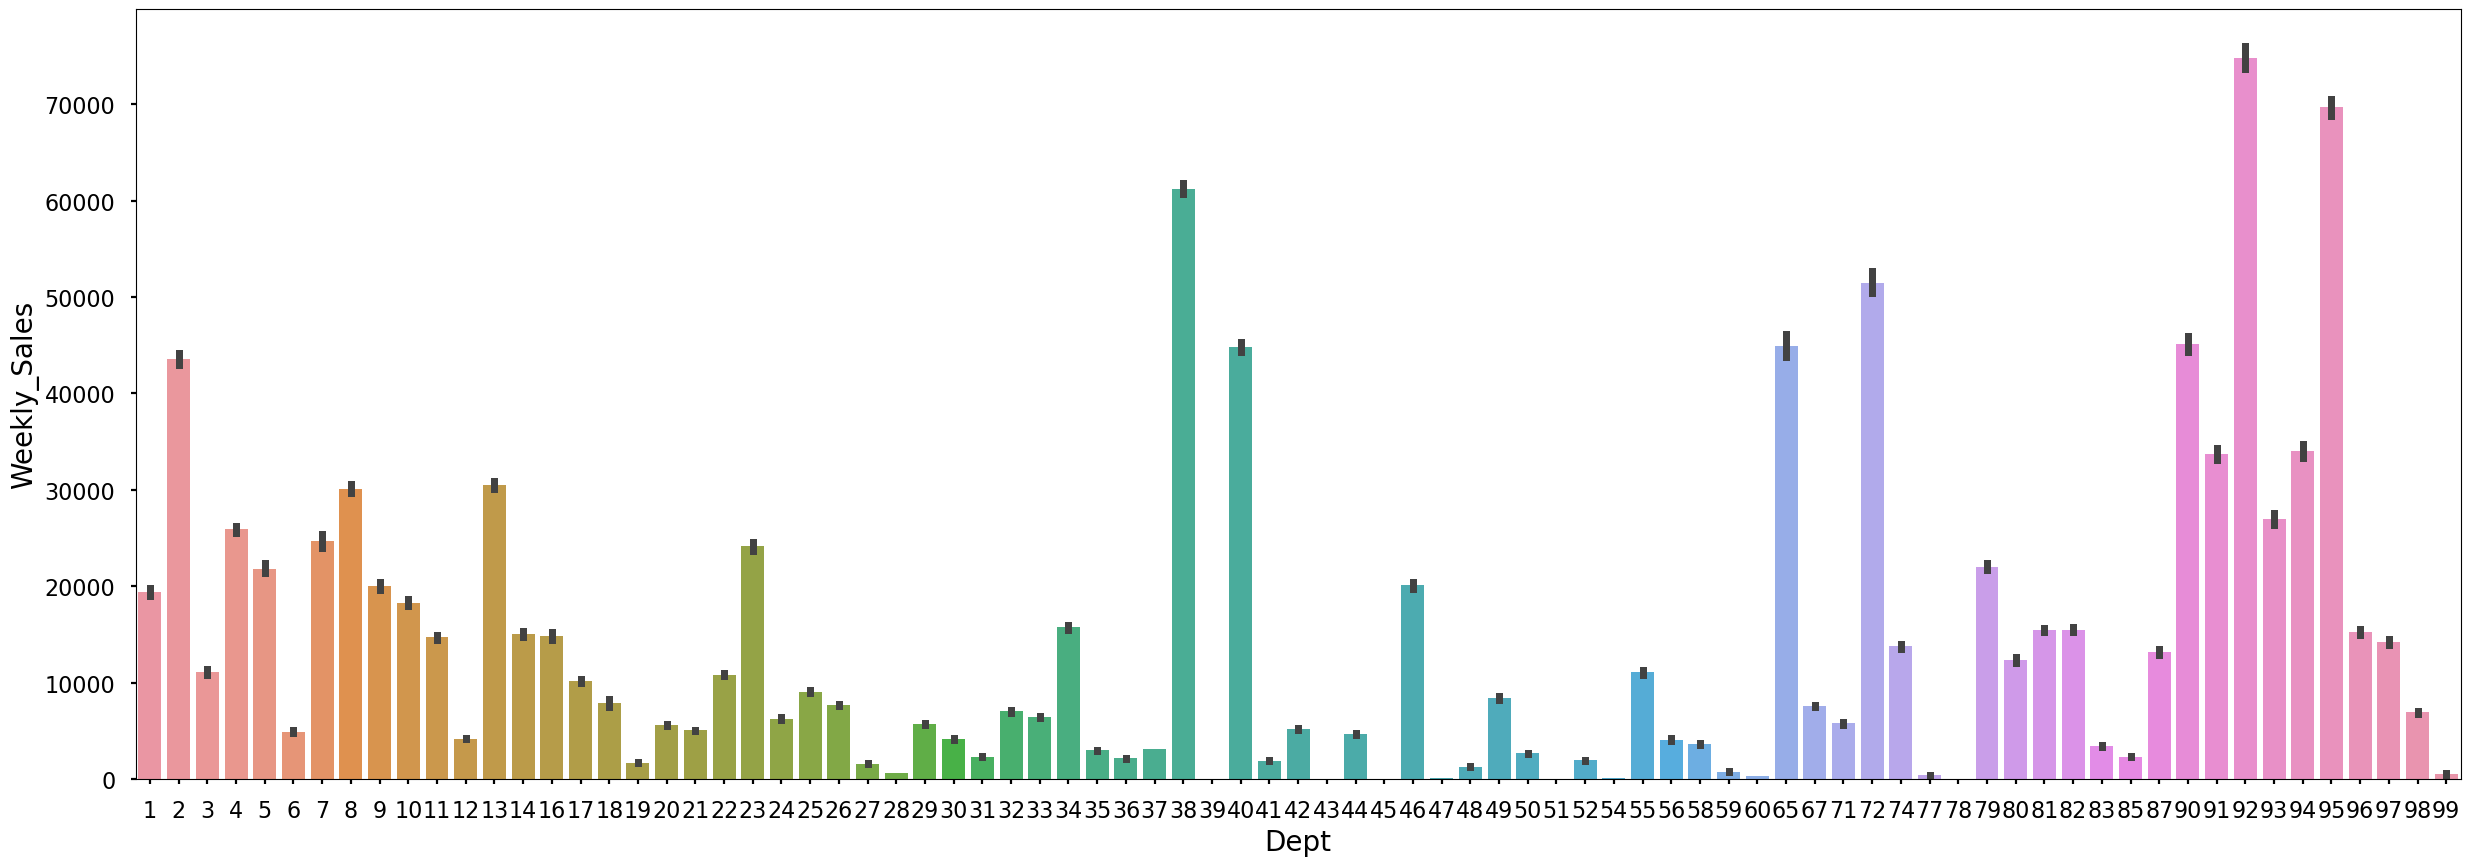

In [62]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

From the first graph, it is seen that one department between 60-80(I assume it is 72), has higher sales values. But, when we take the averages, it is seen that department 92 has higher mean sales. Department 72 is seasonal department, I think. It has higher values is some seasons but on average 92 is higher.

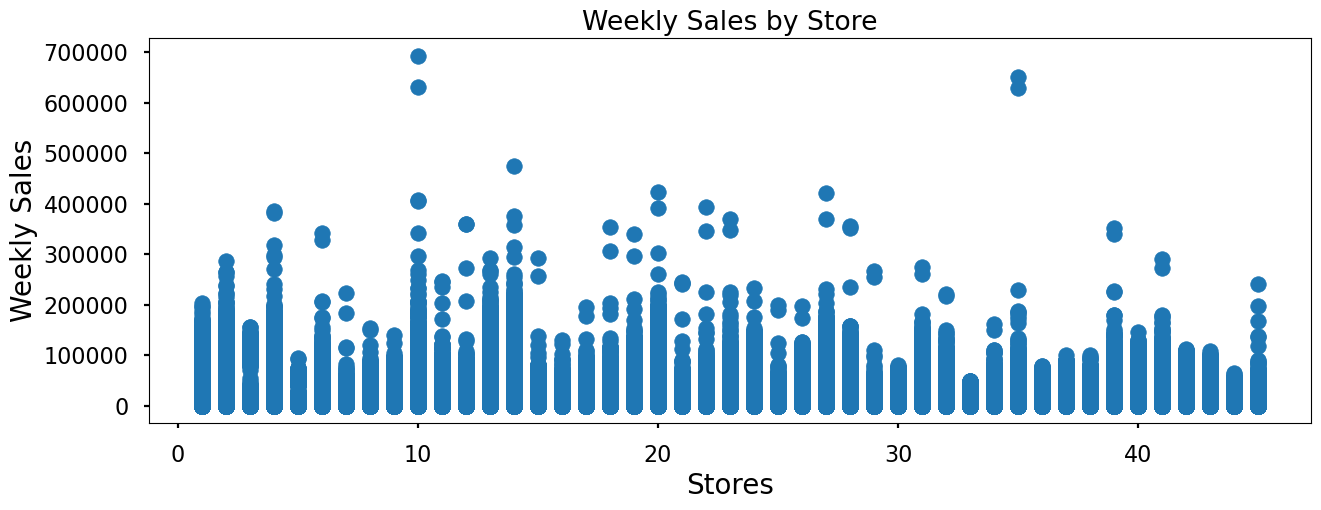

In [63]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

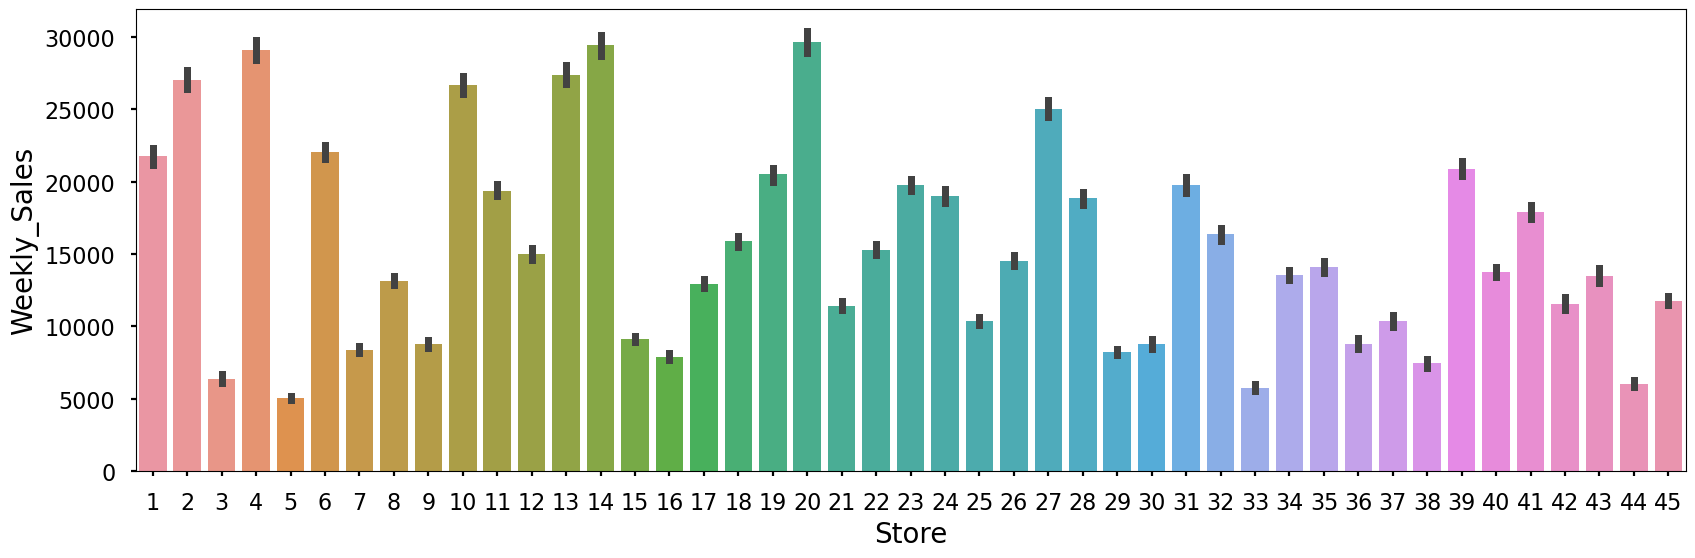

In [64]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

Same thing happens in stores. From the first graph, some stores has higher sales but on average store 20 is the best and 4 and 14 following it.

# Changing Date to Datetime and Creating New Columns

In [65]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

In [66]:
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16146.389599
9     15086.287539
10    15150.112727
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [67]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    16318.648285
2011    16007.797985
2012    15782.234141
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

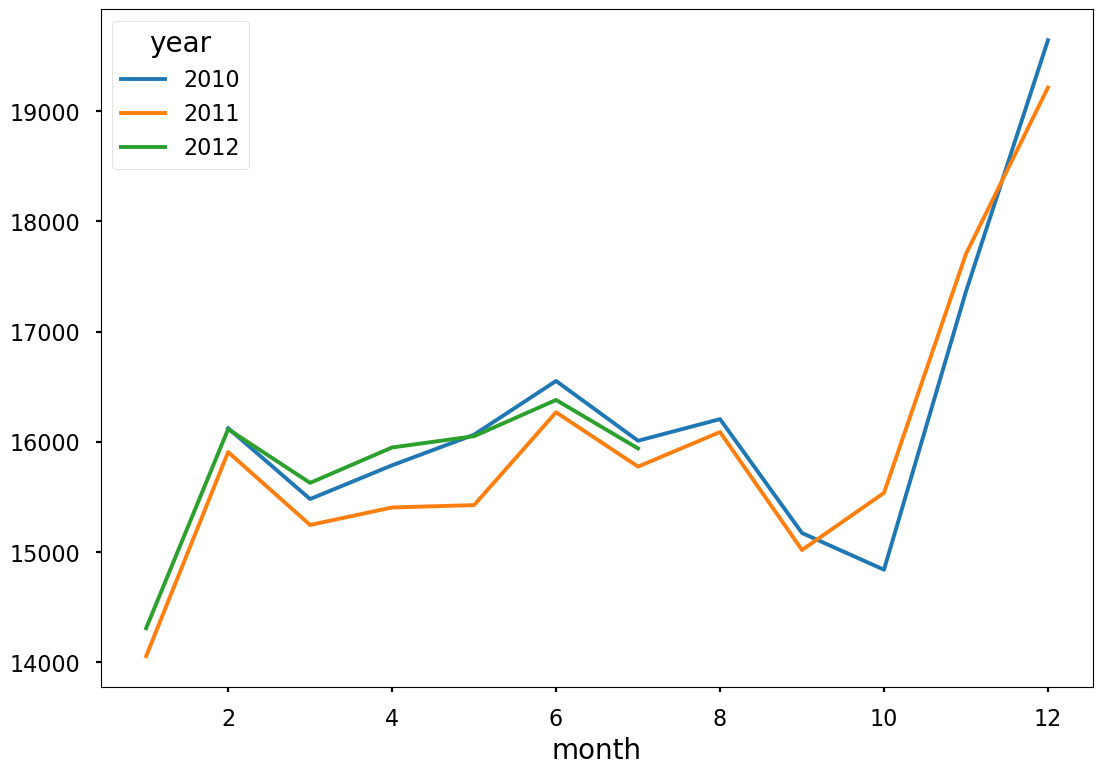

In [68]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

From the graph, it is seen that 2011 has lower sales than 2010 generally. When we look at the mean sales it is seen that 2010 has higher values, but 2012 has no information about November and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is near to 2010. Most probably, it will take the first place if we get 2012 results and add them.

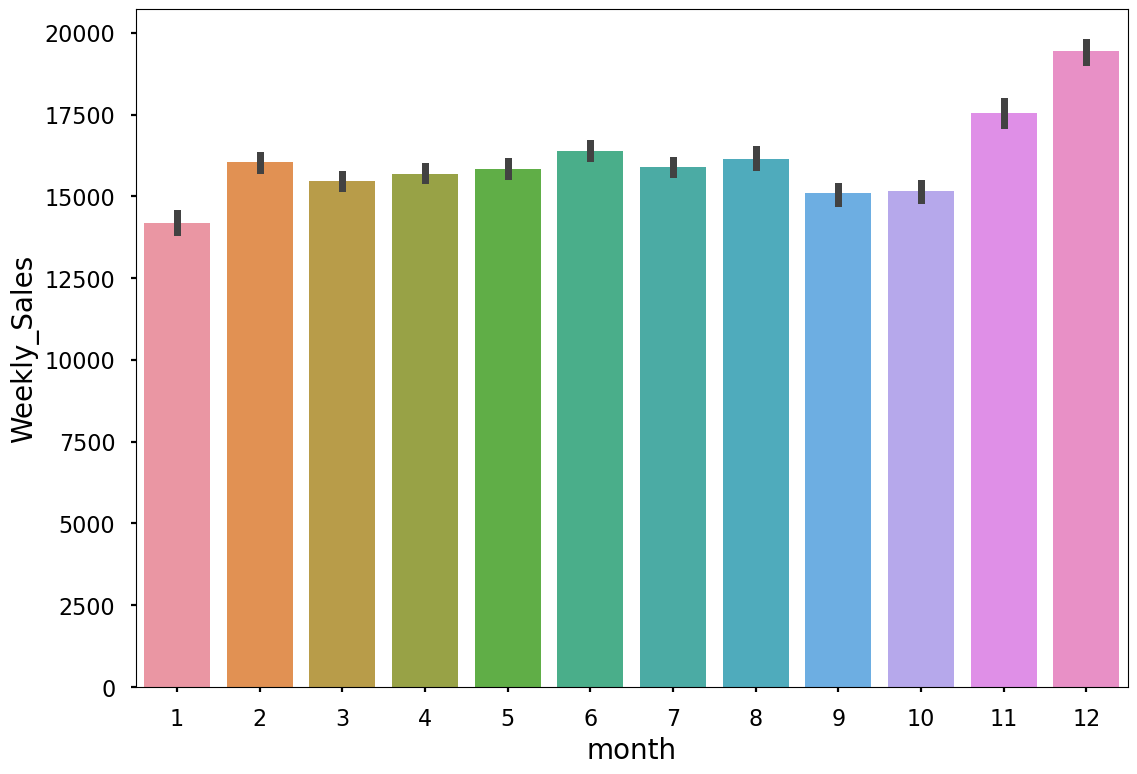

In [69]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

When we look at the graph above, the best sales are in December and November, as expected. The highest values are belongs to Thankgiving holiday but when we take average it is obvious that December has the best value.

In [70]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

Top 5 sales averages by weekly belongs to 1-2 weeks before Christmas, Thanksgiving, Black Friday and end of May, when the schools are closed. 

<Axes: xlabel='week'>

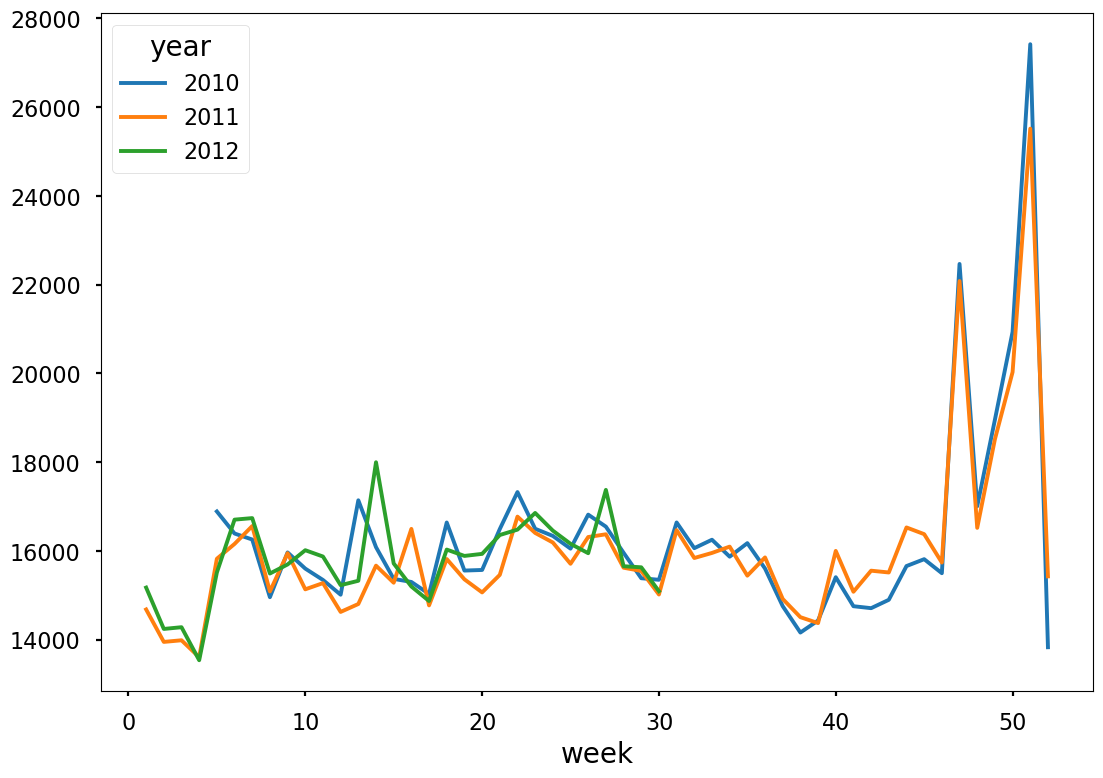

In [71]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

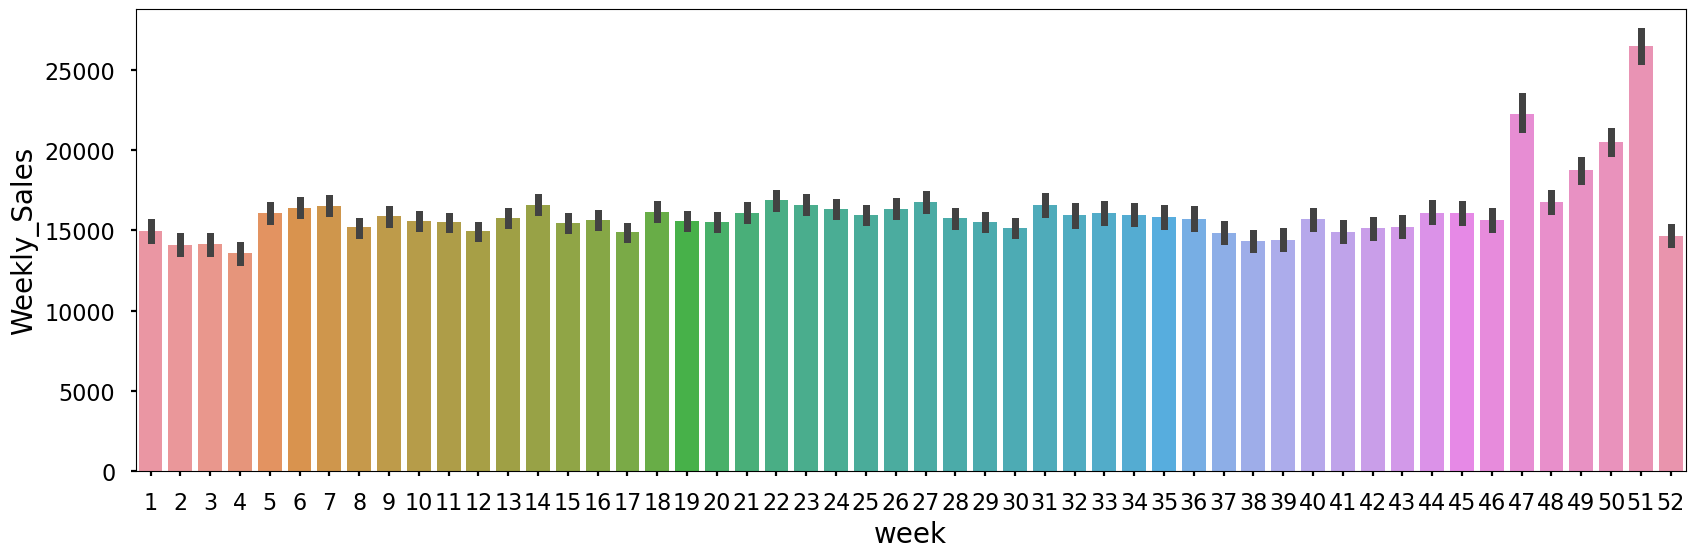

In [72]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

From graphs, it is seen that 51th week and 47th weeks have significantly higher averages as Christmas, Thankgiving and Black Friday effects.

# Fuel Price, CPI , Temperature Effects



<Axes: xlabel='Fuel_Price'>

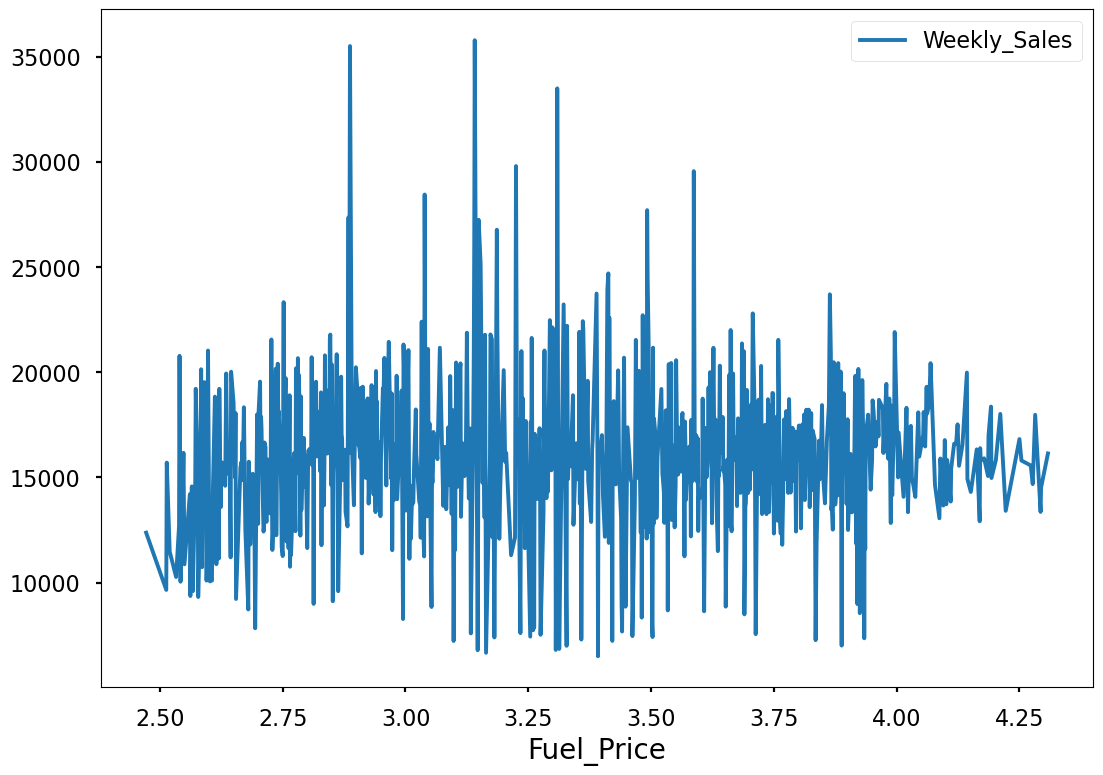

In [73]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

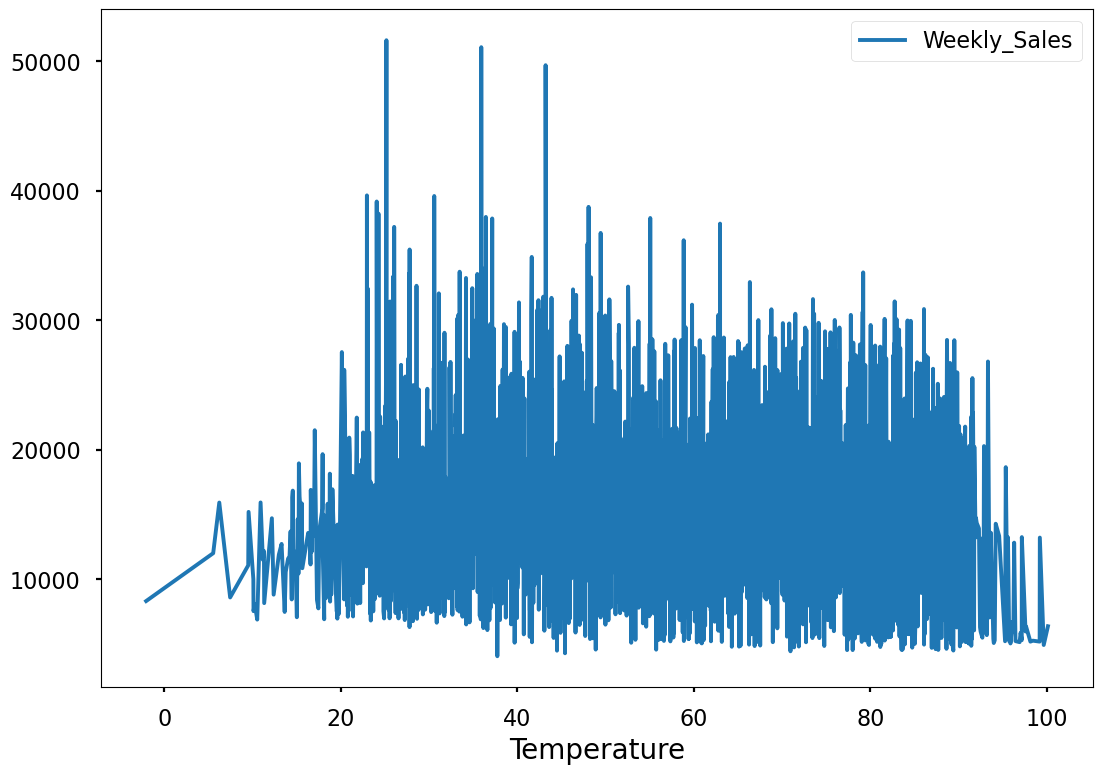

In [74]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

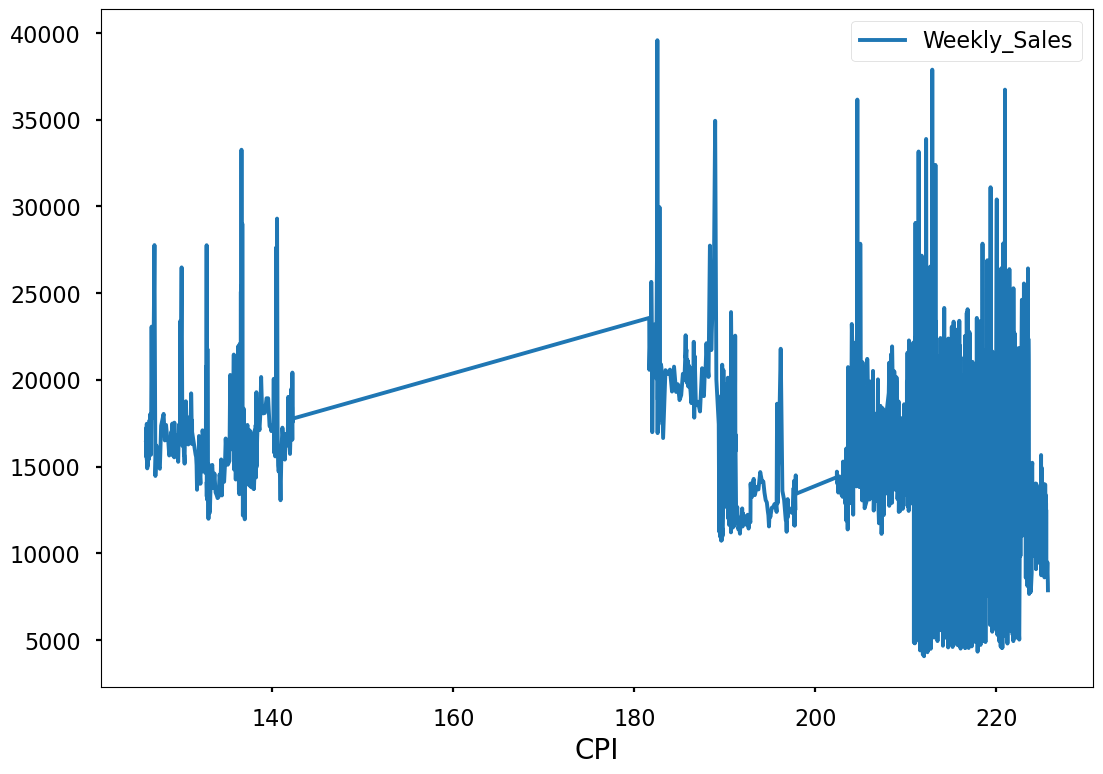

In [75]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

From graphs, it is seen that there are no significant patterns between CPI, temperature, fuel price vs weekly sales.

In [76]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,...,PROMO5,CPI,Type,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,A,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,A,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,A,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,A,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,A,False,False,False,False,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383035,45,93,2012-07-27,3326.52,False,77.20,3.647,5753.81,167.95,1.23,...,3156.06,191.165566,B,False,False,False,False,30,7,2012
383036,45,94,2012-07-27,4124.28,False,77.20,3.647,5753.81,167.95,1.23,...,3156.06,191.165566,B,False,False,False,False,30,7,2012
383037,45,95,2012-07-27,51943.79,False,77.20,3.647,5753.81,167.95,1.23,...,3156.06,191.165566,B,False,False,False,False,30,7,2012
383038,45,97,2012-07-27,6157.29,False,77.20,3.647,5753.81,167.95,1.23,...,3156.06,191.165566,B,False,False,False,False,30,7,2012


In [77]:
df1 = df.copy()
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,...,PROMO5,CPI,Type,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,A,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,A,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,A,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,A,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,A,False,False,False,False,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383035,45,93,2012-07-27,3326.52,False,77.20,3.647,5753.81,167.95,1.23,...,3156.06,191.165566,B,False,False,False,False,30,7,2012
383036,45,94,2012-07-27,4124.28,False,77.20,3.647,5753.81,167.95,1.23,...,3156.06,191.165566,B,False,False,False,False,30,7,2012
383037,45,95,2012-07-27,51943.79,False,77.20,3.647,5753.81,167.95,1.23,...,3156.06,191.165566,B,False,False,False,False,30,7,2012
383038,45,97,2012-07-27,6157.29,False,77.20,3.647,5753.81,167.95,1.23,...,3156.06,191.165566,B,False,False,False,False,30,7,2012


# Findings and Explorations

## Cleaning Process

- The data has no too much missing values. All columns was checked. 
- I choose rows which has higher than 0 weekly sales. Minus values are 0.3% of data. So, I dropped them.

## Explorations & Findings

- There are 45 stores and 81 department in data. Departments are not same in all stores. 
- Although department 72 has higher weekly sales values, on average department 92 is the best. It shows us, some departments has higher values as seasonal like Thanksgiving. It is consistant when we look at the top 5 sales in data, all of them belongs to 72th department at Thanksgiving holiday time. 
- Although stores 10 and 35 have higher weekly sales values sometimes, in general average store 20 and store 4 are on the first and second rank. It means that some areas has higher seasonal sales. 
- Stores has 3 types as A, B and C according to their sizes. Almost half of the stores are bigger than 150000 and categorized as A. According to type, sales of the stores are changing.
- As expected, holiday average sales are higher than normal dates.
- Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart.
- Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.
- It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. Interestingly, 5th top sales belongs to 22th week of the year. This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and 5th important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May. 
- January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.
- CPI, temperature, and fuel price have no pattern on weekly sales. We can do feature engineering to see if there is any effect on the weekly sales.


### Feature Engineering

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import calendar

In [79]:
stores=pd.read_csv(r"C:\Users\shrimantas\Downloads\New folder\hackathon\stores.csv")
ext=pd.read_csv(r"C:\Users\shrimantas\Downloads\New folder\hackathon\external_data.csv")
sales=pd.read_csv(r"C:\Users\shrimantas\Downloads\New folder\hackathon\sales.csv")

In [80]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
dtypes: int64(1), object(1)
memory usage: 848.0+ bytes


In [81]:
ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Store        8190 non-null   int64  
 1   Date         8190 non-null   object 
 2   Temperature  8190 non-null   float64
 3   Fuel_Price   8190 non-null   float64
 4   PROMO1       4032 non-null   float64
 5   PROMO2       2921 non-null   float64
 6   PROMO3       3613 non-null   float64
 7   PROMO4       3464 non-null   float64
 8   PROMO5       4050 non-null   float64
 9   CPI          7605 non-null   float64
 10  IsHoliday    8190 non-null   bool   
dtypes: bool(1), float64(8), int64(1), object(1)
memory usage: 648.0+ KB


In [82]:
stores_group = sales.groupby(['Store','Date'])[['Weekly_Sales']].sum()
stores_group.reset_index(inplace=True)
stores_group.head()

,Store,Date,Weekly_Sales
0,1,1/13/2012,1459601.17
1,1,1/14/2011,1391013.96
2,1,1/20/2012,1394393.84
3,1,1/21/2011,1327405.42
4,1,1/27/2012,1319325.59


In [83]:
sales.size

1915200

In [84]:
stores_group.size

17550

In [85]:
df=stores_group.merge(stores, how='inner').merge(ext, how='inner')
df.head()

,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday
0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,False
1,1,1/14/2011,1391013.96,A,35.40,2.983,NaN,NaN,NaN,NaN,NaN,211.457411,False
2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.87,2807.19,33.88,500.62,3400.21,219.985689,False
3,1,1/21/2011,1327405.42,A,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,False
4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,220.078852,False


In [86]:
df.shape

(5850, 13)

In [87]:
sales.shape

(383040, 5)

In [88]:
df['date']=pd.to_datetime(df['Date'])
df['year']=pd.to_datetime(df['Date']).dt.year
df['month']=pd.to_datetime(df['Date']).dt.month
df['week']=pd.to_datetime(df['Date']).dt.week
df['day']=pd.to_datetime(df['Date']).dt.day
df['month']=df['month'].apply(lambda x:calendar.month_abbr[x])

In [89]:
df.head()

,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday,date,year,month,week,day
0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,False,2012-01-13,2012,Jan,2,13
1,1,1/14/2011,1391013.96,A,35.40,2.983,NaN,NaN,NaN,NaN,NaN,211.457411,False,2011-01-14,2011,Jan,2,14
2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.87,2807.19,33.88,500.62,3400.21,219.985689,False,2012-01-20,2012,Jan,3,20
3,1,1/21/2011,1327405.42,A,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,False,2011-01-21,2011,Jan,3,21
4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,220.078852,False,2012-01-27,2012,Jan,4,27


In [90]:
# percentage of missing values

def miss(data):
    total=data.isnull().sum()
    percent= (data.isnull().sum()/ data.isnull().count()*100)
    #print('total',total)
    print('percent', percent)

In [91]:
print(miss(df))

percent Store            0.000000
Date             0.000000
Weekly_Sales     0.000000
Type             0.000000
Temperature      0.000000
Fuel_Price       0.000000
PROMO1          70.923077
PROMO2          77.623932
PROMO3          74.034188
PROMO4          75.128205
PROMO5          70.769231
CPI              0.000000
IsHoliday        0.000000
date             0.000000
year             0.000000
month            0.000000
week             0.000000
day              0.000000
dtype: float64
None


In [92]:
print(miss(df))

percent Store            0.000000
Date             0.000000
Weekly_Sales     0.000000
Type             0.000000
Temperature      0.000000
Fuel_Price       0.000000
PROMO1          70.923077
PROMO2          77.623932
PROMO3          74.034188
PROMO4          75.128205
PROMO5          70.769231
CPI              0.000000
IsHoliday        0.000000
date             0.000000
year             0.000000
month            0.000000
week             0.000000
day              0.000000
dtype: float64
None


In [93]:
##### except the promo, no other column has missing value

In [94]:
#convert isholiday to binary
df['IsHoliday']=df['IsHoliday'].apply(lambda x:1 if x==True else 0)

In [95]:
# Outlier removal

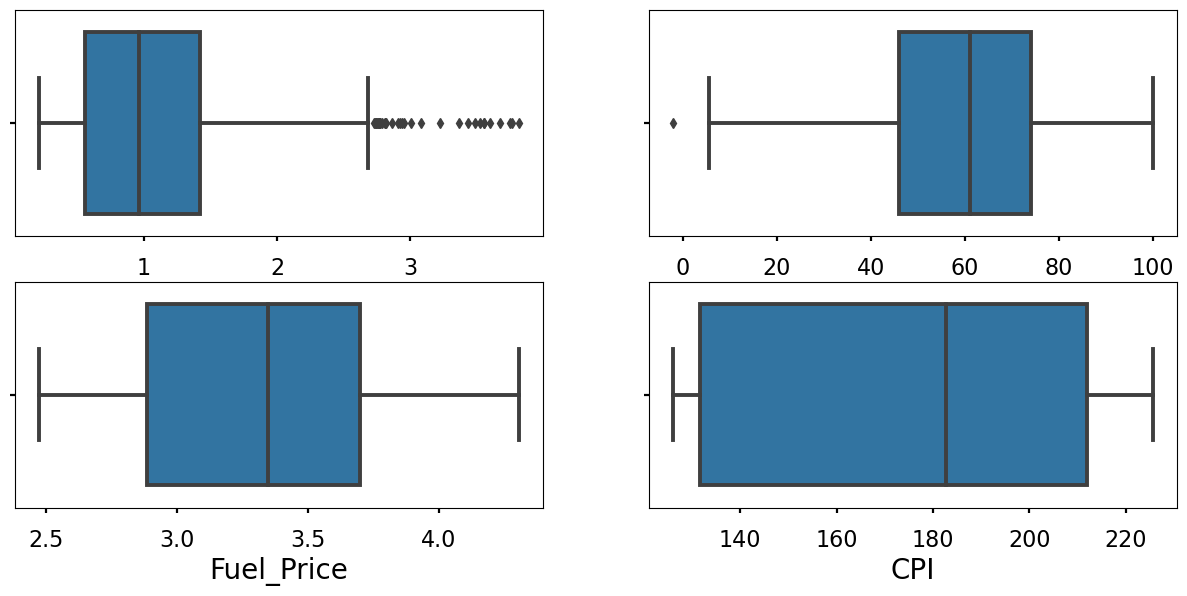

In [96]:
n = 1
cols =["Weekly_Sales","Temperature","Fuel_Price","CPI"]
plt.figure(figsize=(15,10))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [97]:
l = ["Weekly_Sales","Temperature"]
def outlier_removal(l):
    for i in l:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(l)

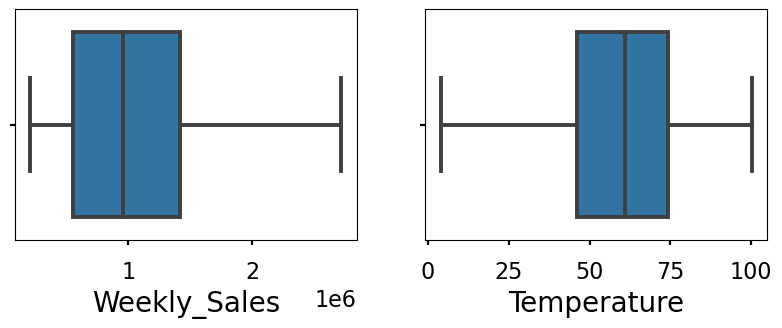

In [98]:
n = 1
cols =["Weekly_Sales","Temperature"]
plt.figure(figsize=(15,3))
for i in cols:
        if n<=3:
            plt.subplot(1,3,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [99]:
df

,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday,date,year,month,week,day
0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,0,2012-01-13,2012,Jan,2,13
1,1,1/14/2011,1391013.96,A,35.40,2.983,NaN,NaN,NaN,NaN,NaN,211.457411,0,2011-01-14,2011,Jan,2,14
2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.87,2807.19,33.88,500.62,3400.21,219.985689,0,2012-01-20,2012,Jan,3,20
3,1,1/21/2011,1327405.42,A,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,0,2011-01-21,2011,Jan,3,21
4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,220.078852,0,2012-01-27,2012,Jan,4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,45,9/23/2011,714106.42,B,63.75,3.711,NaN,NaN,NaN,NaN,NaN,187.029532,0,2011-09-23,2011,Sep,38,23
5846,45,9/24/2010,678228.58,B,68.59,2.713,NaN,NaN,NaN,NaN,NaN,182.669674,0,2010-09-24,2010,Sep,38,24
5847,45,9/3/2010,790144.70,B,78.37,2.715,NaN,NaN,NaN,NaN,NaN,182.604292,0,2010-09-03,2010,Sep,35,3
5848,45,9/30/2011,698986.34,B,70.66,3.645,NaN,NaN,NaN,NaN,NaN,187.256664,0,2011-09-30,2011,Sep,39,30


In [100]:
# Treating missing values

KNNimputer is a scikit-learn class used to fill out or predict the missing values in a dataset. It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median. In this approach, we specify a distance from the missing values which is also known as the K parameter. The missing value will be predicted in reference to the mean of the neighbours. It is implemented by the KNNimputer() method which contains the following arguments:

n_neighbors: number of data points to include closer to the missing value. metric: the distance metric to be used for searching. values – {nan_euclidean. callable} by default – nan_euclidean weights: to determine on what basis should the neighboring values be treated values -{uniform , distance, callable} by default- uniform.

In [101]:
# import the KNNimputer class
from sklearn.impute import KNNImputer
 
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
#imputer = KNNImputer(n_neighbors=2)
selected_col = ['PROMO1','PROMO2','PROMO3','PROMO4','PROMO5']
X = df[selected_col].values
X_imputed = imputer.fit_transform(X)
df[selected_col] = X_imputed
df

,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday,date,year,month,week,day
0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.290000,8025.870000,42.24000,453.080000,3719.380000,219.892526,0,2012-01-13,2012,Jan,2,13
1,1,1/14/2011,1391013.96,A,35.40,2.983,6752.862216,4007.457273,1805.10925,3356.259911,4607.580544,211.457411,0,2011-01-14,2011,Jan,2,14
2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.870000,2807.190000,33.88000,500.620000,3400.210000,219.985689,0,2012-01-20,2012,Jan,3,20
3,1,1/21/2011,1327405.42,A,44.04,3.016,6752.862216,4007.457273,1805.10925,3356.259911,4607.580544,211.827234,0,2011-01-21,2011,Jan,3,21
4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.460000,1082.740000,44.00000,11.000000,1222.190000,220.078852,0,2012-01-27,2012,Jan,4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,45,9/23/2011,714106.42,B,63.75,3.711,6752.862216,4007.457273,1805.10925,3356.259911,4607.580544,187.029532,0,2011-09-23,2011,Sep,38,23
5846,45,9/24/2010,678228.58,B,68.59,2.713,6752.862216,4007.457273,1805.10925,3356.259911,4607.580544,182.669674,0,2010-09-24,2010,Sep,38,24
5847,45,9/3/2010,790144.70,B,78.37,2.715,6752.862216,4007.457273,1805.10925,3356.259911,4607.580544,182.604292,0,2010-09-03,2010,Sep,35,3
5848,45,9/30/2011,698986.34,B,70.66,3.645,6752.862216,4007.457273,1805.10925,3356.259911,4607.580544,187.256664,0,2011-09-30,2011,Sep,39,30


In [102]:
df.shape

(5850, 18)

In [103]:
df.head()

,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday,date,year,month,week,day
0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.290000,8025.870000,42.24000,453.080000,3719.380000,219.892526,0,2012-01-13,2012,Jan,2,13
1,1,1/14/2011,1391013.96,A,35.40,2.983,6752.862216,4007.457273,1805.10925,3356.259911,4607.580544,211.457411,0,2011-01-14,2011,Jan,2,14
2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.870000,2807.190000,33.88000,500.620000,3400.210000,219.985689,0,2012-01-20,2012,Jan,3,20
3,1,1/21/2011,1327405.42,A,44.04,3.016,6752.862216,4007.457273,1805.10925,3356.259911,4607.580544,211.827234,0,2011-01-21,2011,Jan,3,21
4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.460000,1082.740000,44.00000,11.000000,1222.190000,220.078852,0,2012-01-27,2012,Jan,4,27


### Machine learning on the data

In [104]:
from time import strptime
df['month_number'] = [strptime(str(x), '%b').tm_mon for x in df['month']]

<Axes: >

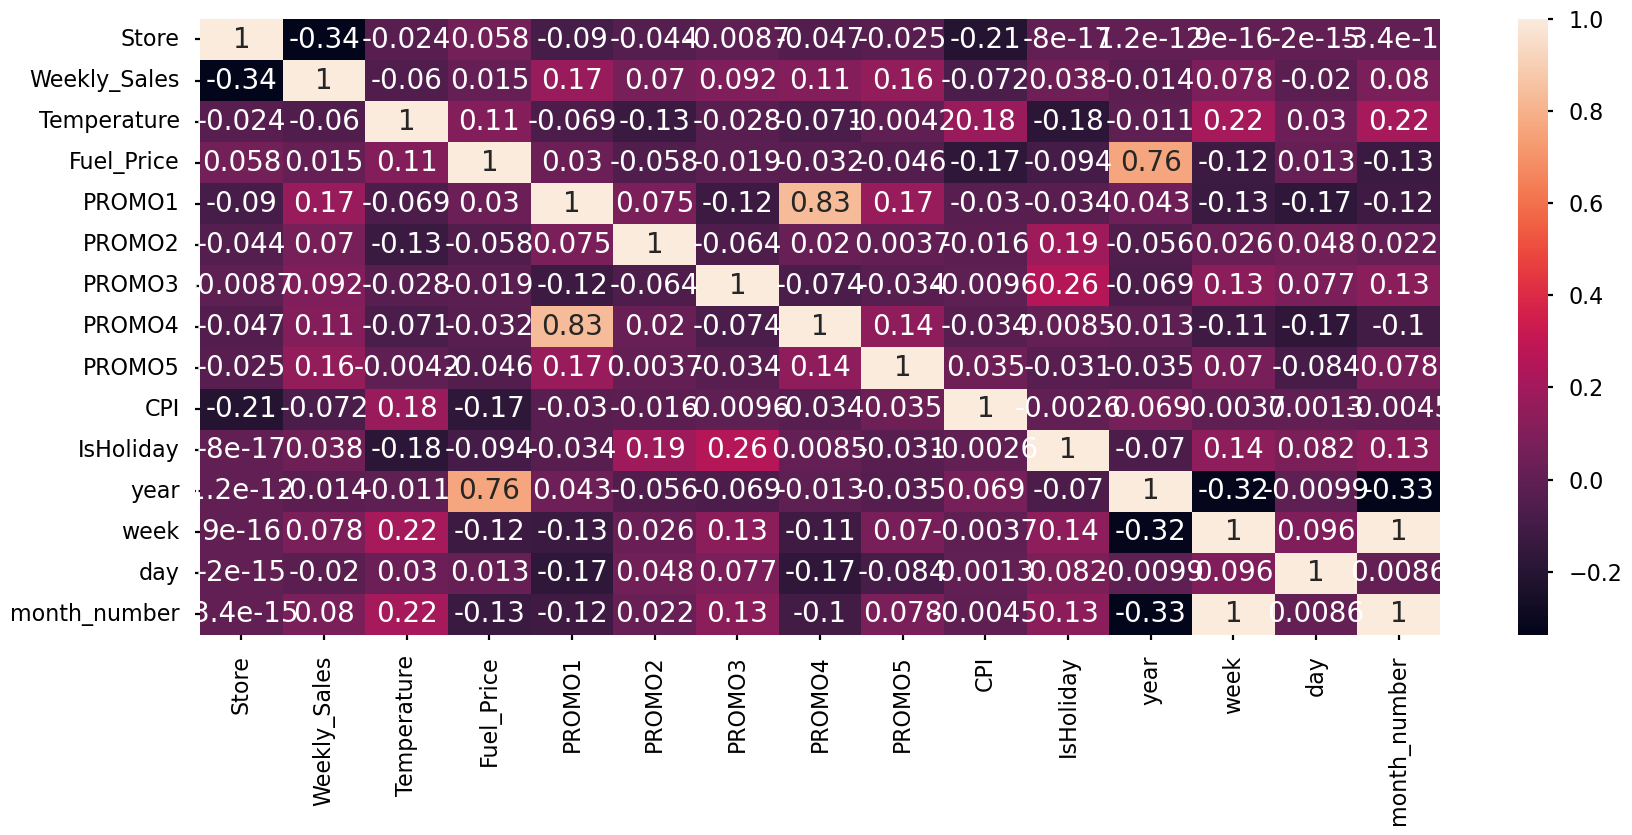

In [105]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)

### Promos1 and Promos4 are higly correlated and Year and Fuel_Price are highly correlated. We drop the columns Promo4 and Fuel_Price.

In [106]:
X=df.drop(['Weekly_Sales','date','Date','Type','month','PROMO4','Fuel_Price','day'],axis=1)
Y=df['Weekly_Sales']

In [107]:
X.head()

,Store,Temperature,PROMO1,PROMO2,PROMO3,PROMO5,CPI,IsHoliday,year,week,month_number
0,1,48.53,5183.290000,8025.870000,42.24000,3719.380000,219.892526,0,2012,2,1
1,1,35.40,6752.862216,4007.457273,1805.10925,4607.580544,211.457411,0,2011,2,1
2,1,54.11,4139.870000,2807.190000,33.88000,3400.210000,219.985689,0,2012,3,1
3,1,44.04,6752.862216,4007.457273,1805.10925,4607.580544,211.827234,0,2011,3,1
4,1,54.26,1164.460000,1082.740000,44.00000,1222.190000,220.078852,0,2012,4,1


In [108]:
Y.head()

0    1459601.17
1    1391013.96
2    1394393.84
3    1327405.42
4    1319325.59
Name: Weekly_Sales, dtype: float64

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [110]:
st=StandardScaler()
x_scaled=st.fit_transform(X)
x_train, x_test, y_train, y_test=train_test_split(x_scaled, Y, test_size=0.2, random_state=42)

In [111]:
def calculate_mape(actual_values, predicted_values):
    with np.errstate(divide='ignore', invalid='ignore'):
        mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
        #mape[actual == 0] = 0.0001  # Replace zero actual values with 0.0001 to avoid inf
    return mape

In [112]:
def model(y_test,y_train,x_test,x_train,model):
    
    fitted_model = model()
    fitted_model.fit(x_train,y_train)
    y_pred = fitted_model.predict(x_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
        
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')
    print(f'MAPE:{calculate_mape(y_test, y_pred)}')

In [113]:
x = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor, ExtraTreesRegressor]]
x

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
R2 : 20.48 %
MAPE:57.19825577114352
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
R2 : 20.48 %
MAPE:57.19840795288004
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
R2 : 20.48 %
MAPE:57.19935162592239
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
R2 : 17.09 %
MAPE:59.201599097757565
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
R2 : 96.1 %
MAPE:5.583456391693638
-----------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
-----------------
R2 : 93.19 %
MAPE:7.193925973188642
-----------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
-----------------
R2 : 42.46 %
MAPE:40.213735666741165
-----------------
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
-----------------
R2 : 90.31 %
M

[None, None, None, None, None, None, None, None, None]

In [126]:
# Random forest gives greater accuracy at MAPE 5.58.

### Hyperparameters tuning

In [115]:
model1 = RandomForestRegressor(n_estimators=100,random_state=42, max_features=6)
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
r2_score(y_test,y_pred)
print(f'MAPE:{calculate_mape(y_test, y_pred)}')

MAPE:7.291252509248006


In [116]:
# The max_features hyperparameter is auto.
rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100],
    'max_depth': [50],
    'max_features': ["auto"]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_pred1 = best_model.predict(x_test)
r2_score(y_test,y_pred)
print(f'MAPE:{calculate_mape(y_test, y_pred1)}')
print(y_pred1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
MAPE:5.593424804796285
[1353482.225   835908.6296  437043.9933 ...  964460.1532  853665.1422
  573184.0157]


### This y_pred values are the best as the MAPE is the least.

In [117]:
# The max_features hyperparameter is sqrt.
rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50],
    'max_depth': [50],
    'max_features': ["sqrt"]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(x_test)
r2_score(y_test,y_pred2)
print(f'MAPE:{calculate_mape(y_test, y_pred)}')
print(y_pred2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
MAPE:7.291252509248006
[1369171.1558 1010555.2006  420219.6446 ...  970423.0746  939100.1976
  501870.0012]


In [118]:
# The max_features hyperparameter is log2.
rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100],
    'max_depth': [50],
    'max_features': ["auto"]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_pred3 = best_model.predict(x_test)
r2_score(y_test,y_pred)
print(f'MAPE:{calculate_mape(y_test, y_pred3)}')
print(y_pred3)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
MAPE:5.570526774779458
[1348950.9048  795876.7441  420297.4807 ...  959178.7047  853126.6325
  577822.5943]


In [119]:
y_pred1 = np.round(y_pred1, decimals = 2)

In [120]:
len(y_pred1)

1170

In [121]:
l=pd.read_excel('hack.xlsx')
l.head()
l=l.drop(["# This is the aggregated sales for individual stores(the departments are included)."], axis = 1)

In [122]:
l

,Store,year,week
0,1,2012,31
1,2,2012,31
2,3,2012,31
3,4,2012,31
4,5,2012,31
...,...,...,...
985,41,2012,52
986,42,2012,52
987,43,2012,52
988,44,2012,52


In [123]:
# overwrite the "Weekly Sales" column with the predicted values
y_pred = y_pred1[0:990]
l["Weekly_Sales"] = y_pred

In [124]:
l

,Store,year,week,Weekly_Sales
0,1,2012,31,1353482.23
1,2,2012,31,835908.63
2,3,2012,31,437043.99
3,4,2012,31,1493057.04
4,5,2012,31,1564232.57
...,...,...,...,...
985,41,2012,52,496724.17
986,42,2012,52,446394.05
987,43,2012,52,1923568.42
988,44,2012,52,917193.84


In [125]:
l.to_csv("Predictions.csv")

### The departments are aggregated in the predictions data. The time series models are not working as auto-arima gave incorrect predictions and exponential smoothing is just the moving average of the past values and might not be too consistent.